# **Design of a Machine Learning-Based Anomaly Detection for Medical Prescription Data**

#2. Data Preparation



#Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Encoder
from sklearn.preprocessing import LabelEncoder

#Split
from sklearn.model_selection import train_test_split

#Sampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Pickle
import joblib

#Ignore
import warnings
warnings.filterwarnings('ignore')

#Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_merge = joblib.load("/content/drive/MyDrive/final_merge_provider.pkl") #to open
df_merge.head()

,NPI,provider_type,brand_name,num_claims,num_30day_refills,agg_daysupply,cost,num_beneficiaries,fraud
0,1003000126,Internal Medicine,Amlodipine Besylate,22,26.0,780,92.81,12.0,0
1,1003000126,Internal Medicine,Atorvastatin Calcium,41,50.0,1482,373.60,22.0,0
2,1003000126,Internal Medicine,Azithromycin,15,15.0,77,132.57,15.0,0
3,1003000126,Internal Medicine,Carvedilol,21,27.0,787,118.53,11.0,0
4,1003000126,Internal Medicine,Cefdinir,13,13.0,81,203.03,13.0,0


Done!

# **01 Exploratory Data Analysis**


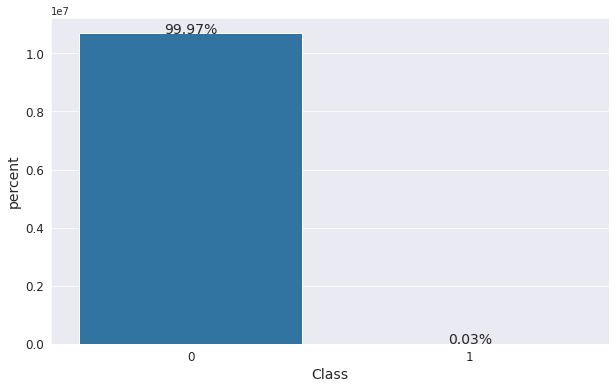

In [ ]:
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    #plt.savefig('distribution.png')
    plt.show()
    

# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(x='fraud',data=df_merge)
plt.xticks(size = 12)
plt.yticks(size = 12)
#plt.title('Distribution of Fraud Class Labels', fontsize=20)
plt.xlabel('Class', size = 14)
plt.ylabel('percent', size = 14)
percentage_without_hue(ax, df_merge['fraud'], 0,40,14)



In [ ]:
df_merge['provider_type'].nunique() #number
#df_merge['provider_type'].unique() #list

Observation:

This is an highly imbalanced dataset. There are 0.03% fraudulent providers and 99.07% non-fraudulent providers.

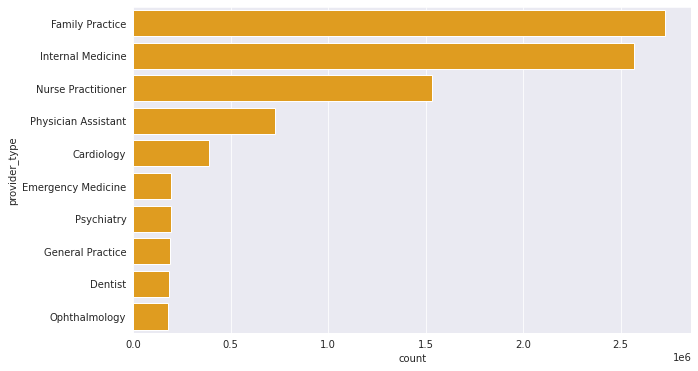

In [ ]:
#find the 10 most frequent categories from the column: 
#df_merge['provider_type'].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.countplot(color='orange', y="provider_type", data=df_merge,
              order=df_merge.provider_type.value_counts().iloc[:10].index)

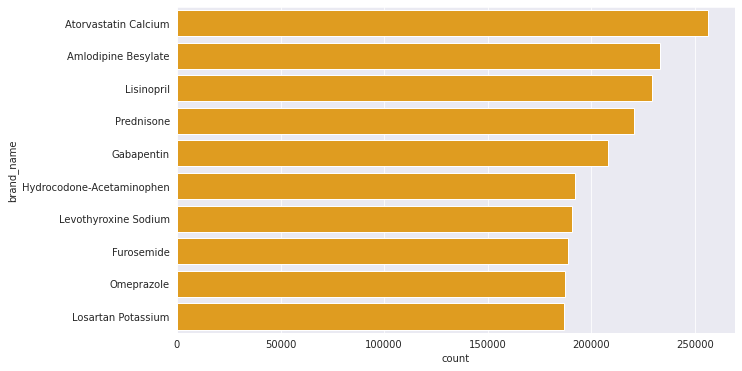

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(color='orange',y="brand_name", data=df_merge,
              order=df_merge.brand_name.value_counts().iloc[:10].index)

In [ ]:
sns.pairplot(df_merge, hue="fraud", diag_kind="hist", vars=['num_claims','num_30day_refills','agg_daysupply','cost','num_beneficiaries'], corner=True)

##Numerical Data
I observed that the fraudulent transactions were generally not above an amount of 0.5 costs. The fraudulent transactions are not evenly distributed 

In [ ]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()  

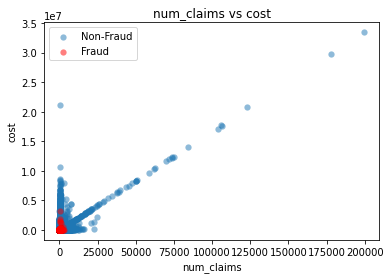

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.num_claims[df_merge.fraud == 0], df_merge.cost[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.num_claims[df_merge.fraud == 1], df_merge.cost[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("num_claims vs cost")
plt.xlabel("num_claims")
plt.ylabel("cost")
plt.legend()
plt.show()

num_claims	
num_30day_refills	
agg_daysupply	
cost	
num_beneficiaries


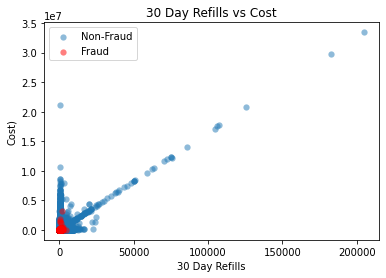

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.num_30day_refills[df_merge.fraud == 0], df_merge.cost[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.num_30day_refills[df_merge.fraud == 1], df_merge.cost[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("30_day_refills vs cost")
plt.xlabel("30_day_refills")
plt.ylabel("cost)")
plt.legend()
plt.show()

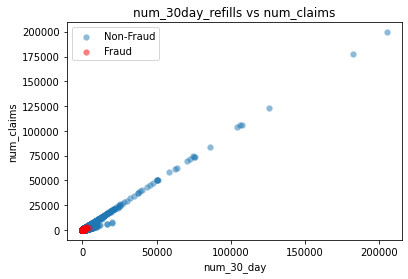

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.num_30day_refills[df_merge.fraud == 0], df_merge.num_claims[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.num_30day_refills[df_merge.fraud == 1], df_merge.num_claims[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("num_30day_refills vs num_claims")
plt.xlabel("num_30_day")
plt.ylabel("num_claims")
plt.legend()
plt.show()

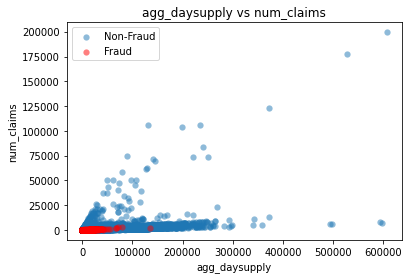

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 0], df_merge.num_claims[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 1], df_merge.num_claims[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("agg_daysupply vs num_claims")
plt.xlabel("agg_daysupply")
plt.ylabel("num_claims")
plt.legend()
plt.show()

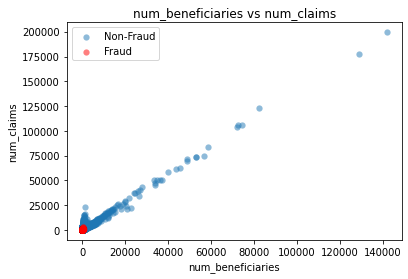

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.num_beneficiaries[df_merge.fraud == 0], df_merge.num_claims[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.num_beneficiaries[df_merge.fraud == 1], df_merge.num_claims[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("num_beneficiaries vs num_claims")
plt.xlabel("num_beneficiaries")
plt.ylabel("num_claims")
plt.legend()
plt.show()

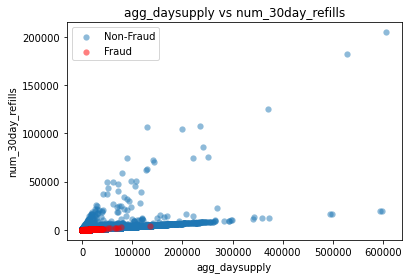

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 0], df_merge.num_30day_refills[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 1], df_merge.num_30day_refills[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("agg_daysupply vs num_30day_refills")
plt.xlabel("agg_daysupply")
plt.ylabel("num_30day_refills")
plt.legend()
plt.show()

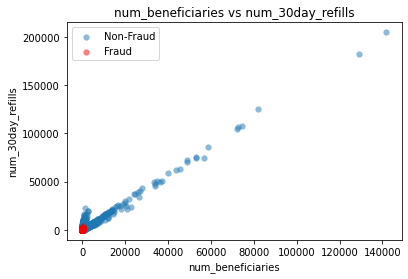

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.num_beneficiaries[df_merge.fraud == 0], df_merge.num_30day_refills[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.num_beneficiaries[df_merge.fraud == 1], df_merge.num_30day_refills[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("num_beneficiaries vs num_30day_refills")
plt.xlabel("num_beneficiaries")
plt.ylabel("num_30day_refills")
plt.legend()
plt.show()

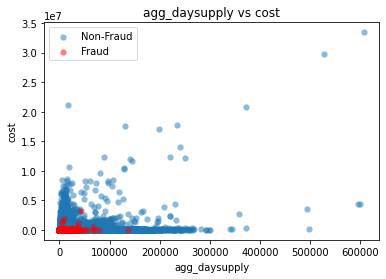

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 0], df_merge.cost[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 1], df_merge.cost[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("agg_daysupply vs cost")
plt.xlabel("agg_daysupply")
plt.ylabel("cost")
plt.legend()
plt.show()

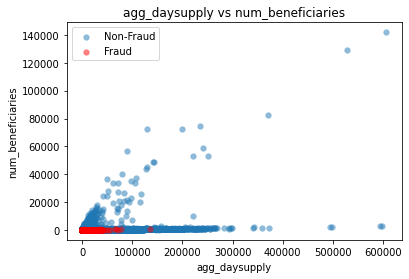

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 0], df_merge.num_beneficiaries[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 1], df_merge.num_beneficiaries[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("agg_daysupply vs num_beneficiaries")
plt.xlabel("agg_daysupply")
plt.ylabel("num_beneficiaries")
plt.legend()
plt.show()

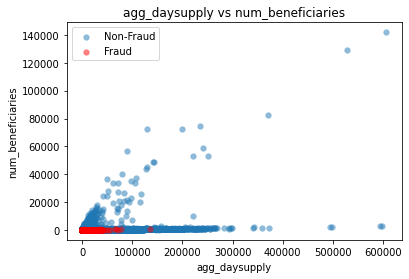

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 0], df_merge.num_beneficiaries[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.agg_daysupply[df_merge.fraud == 1], df_merge.num_beneficiaries[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("agg_daysupply vs num_beneficiaries")
plt.xlabel("agg_daysupply")
plt.ylabel("num_beneficiaries")
plt.legend()
plt.show()

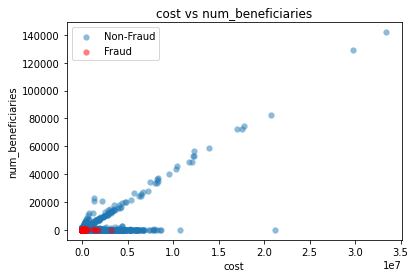

In [ ]:
#works but takes a long time to run
plt.figure()
plt.scatter(df_merge.cost[df_merge.fraud == 0], df_merge.num_beneficiaries[df_merge.fraud == 0], label="Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df_merge.cost[df_merge.fraud == 1], df_merge.num_beneficiaries[df_merge.fraud == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.title("cost vs num_beneficiaries")
plt.xlabel("cost")
plt.ylabel("num_beneficiaries")
plt.legend()
plt.show()

Techniques for Dimensionality Reduction

There are many techniques that can be used for dimensionality reduction.

In this section, we will review the main techniques.

Feature Selection Methods

#Correlation Matrix


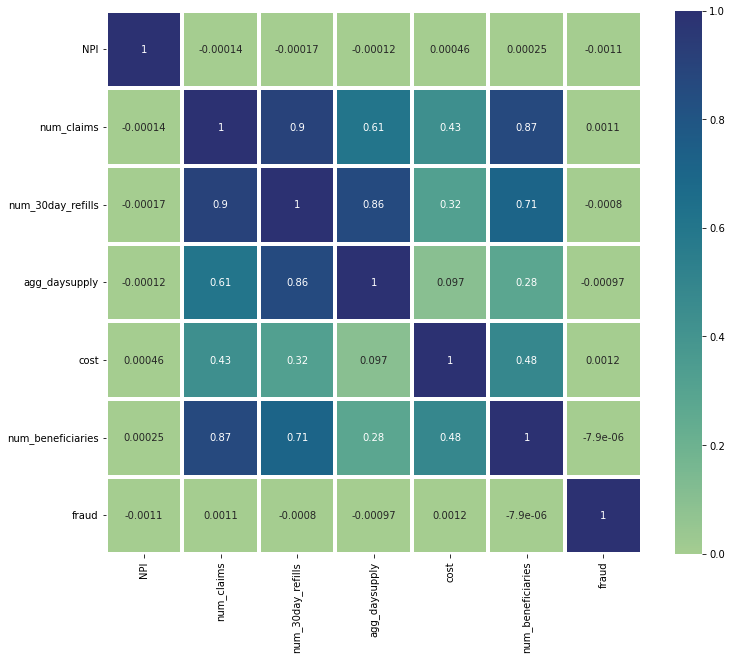

In [ ]:
#The categorical data is missing here, this has to be done beforehand
#The correlation heatmap gets rid of columns that are not suited for correlation
#In this case the categorical data
import seaborn as sns
#import matplotlib.pyplot as plt
#size = 10 
#corrmat = df_less_columns.iloc[:,:size].corr()
corrmat = df_merge.corr()
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corrmat, cmap='crest', annot=True, linewidths=3)

#plt.savefig('svm_conf.png', dpi=400)
#The matrix shows that some of the variables are highly correlated. In the case 
#i should drop one of the correlated features, because otherwise this would bias the result

### Feature Selection with Correlation

In [ ]:
#function selects highly correlated features
#it takes the df and a threshold value. The threshold in this case says 
#it should be at least 75% correlated in order to remove the feature
#the function iterates through the correlation matrix and compares each and every column
#and then finds out if the correlation is greater than the threshold value

def find_correlation(df, threshold):
    col_corr = set() #gives the set of all the names of the correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                   colname = corr_matrix.columns[i]
                   col_corr.add(colname)
    return col_corr

corr_features = find_correlation(df_merge, 0.9)
corr_features
#len(set(corr_features)) #gives the number of features that are highly correlated

{'num_30day_refills'}

In [ ]:
#Drop the highly correlated features
df_dim_reduc = df_merge.drop(corr_features, axis=1) #TODO only drop one
df_dim_reduc

,NPI,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,fraud
0,1003000126,Internal Medicine,Amlodipine Besylate,22,780,92.81,12.0,0
1,1003000126,Internal Medicine,Atorvastatin Calcium,41,1482,373.60,22.0,0
2,1003000126,Internal Medicine,Azithromycin,15,77,132.57,15.0,0
3,1003000126,Internal Medicine,Carvedilol,21,787,118.53,11.0,0
4,1003000126,Internal Medicine,Cefdinir,13,81,203.03,13.0,0
...,...,...,...,...,...,...,...,...
10699499,1992999825,Otolaryngology,Fluticasone Propionate,22,1081,592.42,11.0,0
10699500,1992999825,Otolaryngology,Ipratropium Bromide,43,1183,1885.37,23.0,0
10699501,1992999825,Otolaryngology,Ofloxacin,17,173,397.17,15.0,0
10699502,1992999874,Internal Medicine,Atorvastatin Calcium,19,723,297.63,13.0,0


#LabelEncoder

In [ ]:
le_provider = LabelEncoder()
le_brand = LabelEncoder()

#fit label encoder to categorical data and return encoded labels
df_dim_reduc['provider_type'] = le_provider.fit_transform(df_dim_reduc['provider_type']) #encoded provider
df_dim_reduc['brand_name'] = le_brand.fit_transform(df_dim_reduc['brand_name'])  #encoded brand

#transforms labels back to original encoding
inv_trans_provider = le_provider.inverse_transform(df_dim_reduc['provider_type'])
inv_trans_brand = le_brand.inverse_transform(df_dim_reduc['brand_name'])

In [ ]:
df_dim_reduc_encoded = df_dim_reduc
df_dim_reduc_encoded.head()

,NPI,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,fraud
0,1003000126,68,82,22,780,92.81,12.0,0
1,1003000126,68,126,41,1482,373.60,22.0,0
2,1003000126,68,147,15,77,132.57,15.0,0
3,1003000126,68,258,21,787,118.53,11.0,0
4,1003000126,68,266,13,81,203.03,13.0,0


## One Hot Encoder Top Ten Variables

In [ ]:
#top_10 = [x for x in df.provider_type.value_counts().sort_values(ascending=False).head(10).index]
#top_10
#This takes the top 10 number of categories, based on the value counts and then taking the index. This will give us the categories

In [ ]:
#One Hot Encoding for Multi Categorical Variables

#def one_hot_top_x(df,variable,top_x_labels):
#    for label in top_x_labels:
 #       df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

#one_hot_top_x(df, 'provider_type', top_10)
#df.head(10)

# Drop NPI as not needed for Training

In [ ]:
df_dim_reduc_encoded.drop('NPI', axis=1, inplace=True)

In [ ]:
df_dim_reduc_encoded.head()

,provider_type,brand_name,num_claims,agg_daysupply,cost,num_beneficiaries,fraud
0,68,82,22,780,92.81,12.0,0
1,68,126,41,1482,373.60,22.0,0
2,68,147,15,77,132.57,15.0,0
3,68,258,21,787,118.53,11.0,0
4,68,266,13,81,203.03,13.0,0


#Save Pickle

In [ ]:
joblib.dump(df_dim_reduc_encoded, open("data_preparation.pkl",'wb'))
#x= load("x.pkl") #to open